# 1D convolutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$ \mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.

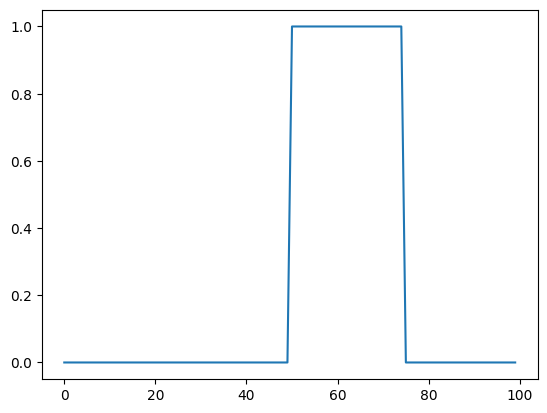

In [2]:
v = np.zeros(100)
v[50 : 75] = 1

plt.plot(v)

Consider the following kernels $\mathbf{k}$:

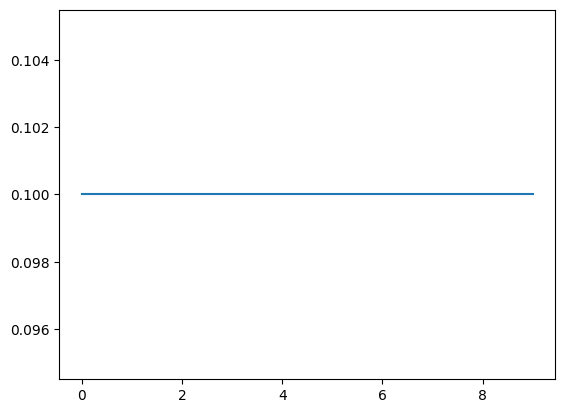

In [3]:
### first kernel
k = np.ones(10)/10

### second kernel
# k = signal.gaussian(20, std=3)
# k = k / np.sum(k)

### third kernel
# k = np.array([-1,2,-1])

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$

Execution time: 3.51e-03 s


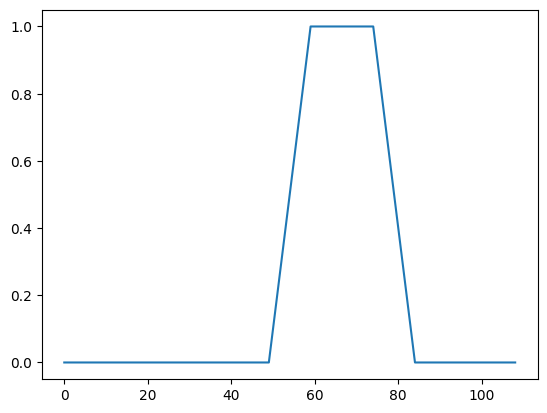

In [4]:
t0 = time.time()

k_padded = np.zeros(len(v) + len(k) - 1)
k_padded[:len(k)] = k
K = linalg.toeplitz(k_padded, np.zeros(len(v)))
v_conv1 = np.matmul(K, v)

print('Execution time: %1.2e s' % (time.time() - t0))

plt.plot(v_conv1)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.

Execution time: 1.23e-03 s


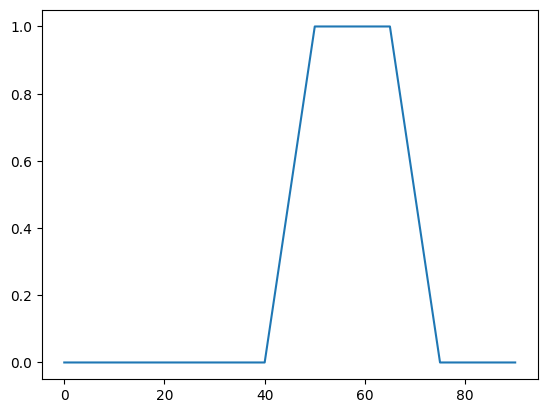

In [7]:
t0 = time.time()

l_out = len(v) - len(k) + 1
v_conv2 = np.empty(l_out)
for i in range(l_out):
  v_conv2[i] = np.sum(np.flip(k) * v[i:i+len(k)])

print('Execution time: %1.2e s' % (time.time() - t0))

plt.plot(v_conv2)

Execution time: 1.42e-03 s


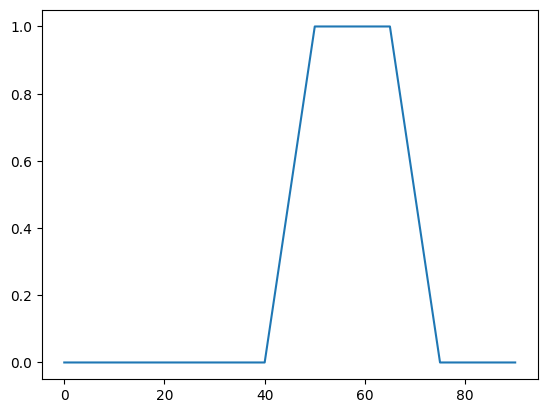

In [8]:
t0 = time.time()

l_out = len(v) - len(k) + 1
v_conv2 = np.array([np.sum(np.flip(k) * v[i:i+len(k)]) for i in range(l_out)])

print('Execution time: %1.2e s' % (time.time() - t0))

plt.plot(v_conv2)

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:
- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


Execution time: 4.75e-04 s


Text(0.5, 1.0, 'v * k')

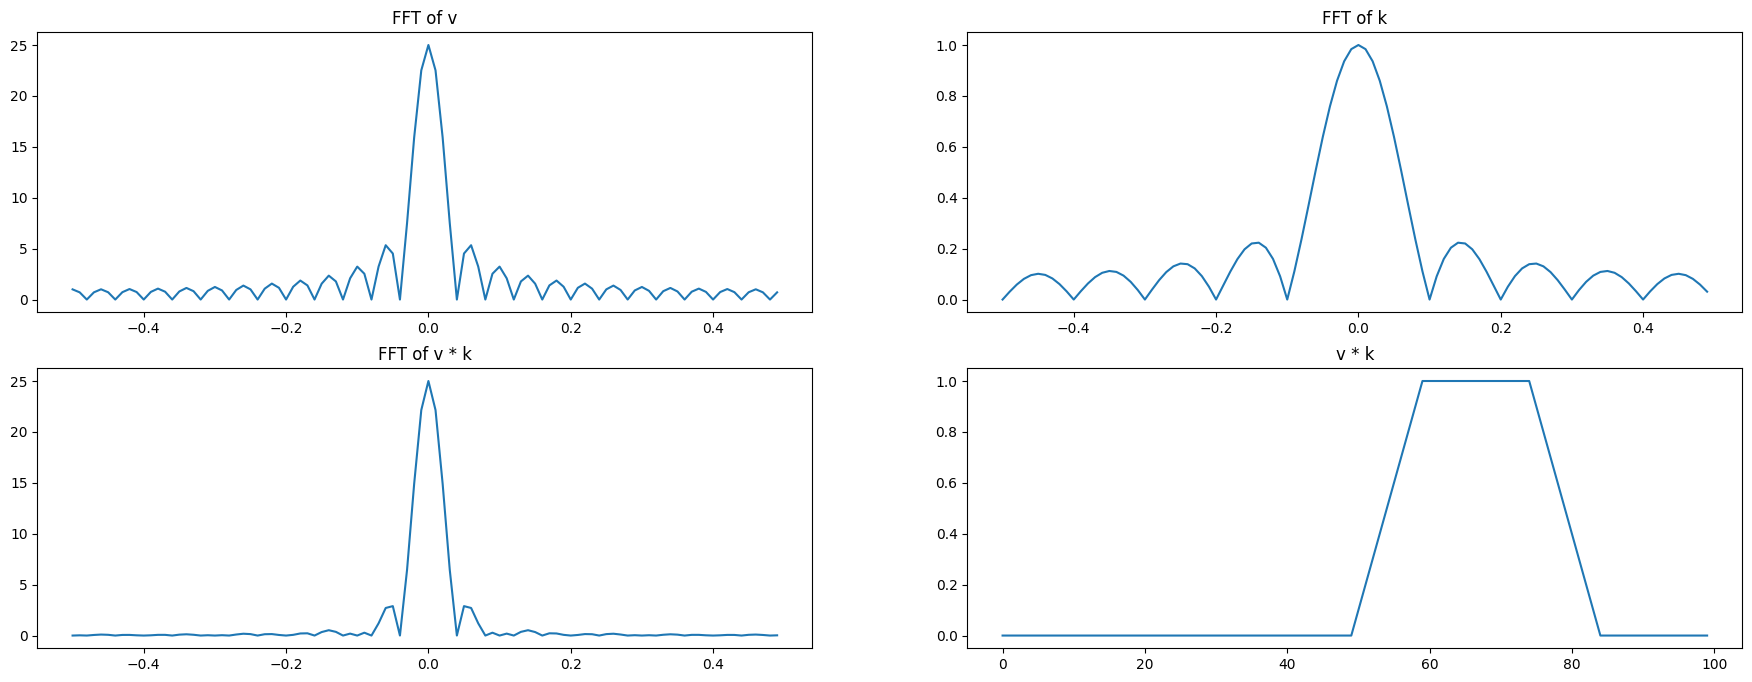

In [9]:
from numpy.fft import ifft, fft, fftshift, fftfreq

t0 = time.time()

v_fft = fft(v)
k_fft = fft(k, len(v))

vk_fft = v_fft*k_fft

v_conv3 = np.real(ifft(vk_fft))

print('Execution time: %1.2e s' % (time.time() - t0))

freq = fftfreq(len(v))

fig, axs = plt.subplots(2,2,figsize=(22,8))
axs[0,0].plot(fftshift(freq), fftshift(np.absolute(v_fft)))
axs[0,0].set_title('FFT of v')
axs[0,1].plot(fftshift(freq), fftshift(np.absolute(k_fft)))
axs[0,1].set_title('FFT of k')
axs[1,0].plot(fftshift(freq), fftshift(np.absolute(vk_fft)))
axs[1,0].set_title('FFT of v * k')
axs[1,1].plot(v_conv3)
axs[1,1].set_title('v * k')

## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

Execution time: 2.52e-04 s


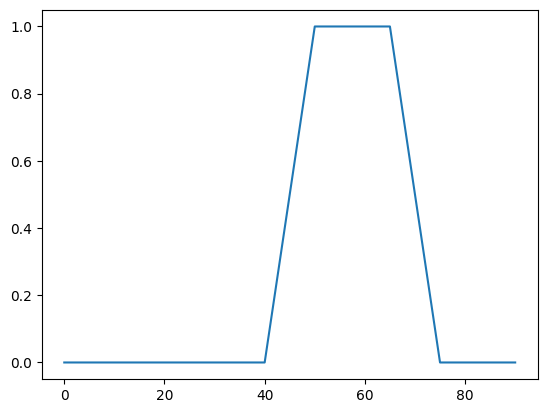

In [10]:
t0 = time.time()

v_conv4 = signal.convolve(v,k, mode = 'valid')

print('Execution time: %1.2e s' % (time.time() - t0))

plt.plot(v_conv4)